In [3]:
pip install osmnx

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt


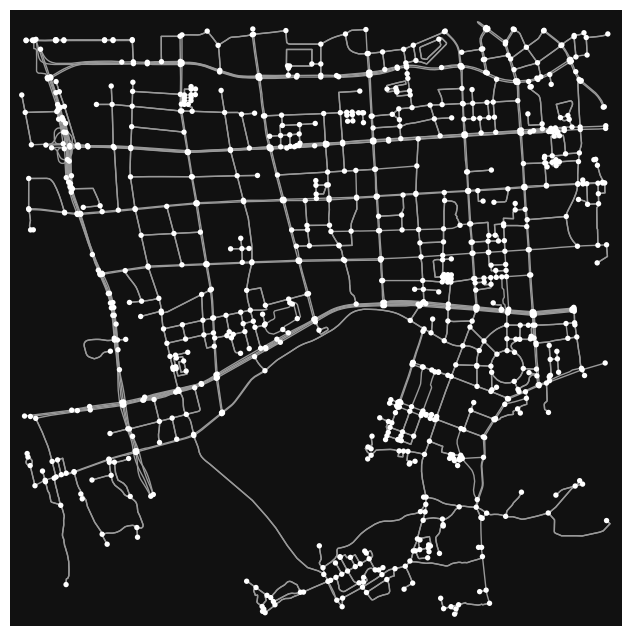

In [126]:
place_name = "Gudang, Hangzhou, China"

# fetch OSM street network (drive, walk, private, etc.) from the location
graph = ox.graph_from_address(place_name, network_type='drive', dist=3100)
fig, ax = ox.plot_graph(graph)

In [177]:
nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes[nodes['highway'] == 'traffic_signals']
# print(traffic_lights)
# 30.275918, 120.100727
# 30.276076, 120.110777
# 30.281993, 120.109132
# 30.281756, 120.099814
# 30.286588, 120.098738
# 30.294818, 120.097855
# 30.294894, 120.097944
30.295046, 120.097944
30.300075, 120.097855


x, y =30.278366, 120.096994



# print(traffic_lights.filter(['y', 'x']==['30.281835', '120.109041']))
target_node = traffic_lights[(abs(traffic_lights['x'] - y) < 0.01) & (abs(traffic_lights['y'] - x) < 0.01)]
# osmid_of_target_node = target_node['id'].values[0]
target_node
# print(traffic_lights['geometry'])


y           x          highway  street_count  \
osmid                                                             
26496834   30.278366  120.106172  traffic_signals             4   
26496835   30.278475  120.106151  traffic_signals             4   
26496836   30.278480  120.106005  traffic_signals             4   
26496837   30.278366  120.106039  traffic_signals             4   
26607405   30.284117  120.104466  traffic_signals             4   
269967683  30.284241  120.104437  traffic_signals             4   
269967684  30.284228  120.104274  traffic_signals             4   
271682804  30.284142  120.100000  traffic_signals             4   
271682869  30.283906  120.094924  traffic_signals             4   
271683582  30.284103  120.104304  traffic_signals             4   
271683593  30.284006  120.100037  traffic_signals             4   
271683606  30.283821  120.094933  traffic_signals             4   
332556590  30.283816  120.094807  traffic_signals             4   
332556593  30.283895  120.094802  traffic_signals             4   

                             geometry  
osmid                                  
26496834   POINT (120.10617 30.27837)  
26496835   POINT (120.10615 30.27847)  
26496836   POINT (120.10600 30.27848)  
26496837   POINT (120.10604 30.27837)  
26607405   POINT (120.10447 30.28412)  
269967683  POINT (120.10444 30.28424)  
269967684  POINT (120.10427 30.28423)  
271682804  POINT (120.10000 30.28414)  
271682869  POINT (120.09492 30.28391)  
271683582  POINT (120.10430 30.28410)  
271683593  POINT (120.10004 30.28401)  
271683606  POINT (120.09493 30.28382)  
332556590  POINT (120.09481 30.28382)  
332556593  POINT (120.09480 30.28390)

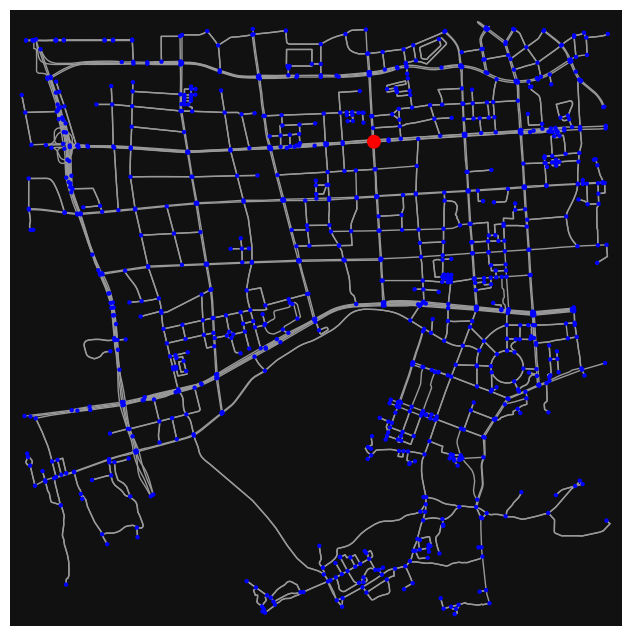

In [201]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
# node1_id = 26197709 # 30.284443	120.114585         2, 3
# node1_id = 3382408994 # 30.278606	120.115016      1,3
# node1_id = 26496837 # 30.278366	120.106039     1,2
# node1_id = 26607405  # 30.284117	120.10446     2,2
# node1_id =  332556593 # 30.283895	120.094802   2,1
# node1_id = 332556598 # 30.288751	120.093849   3,1
# node1_id =  33720424 # 30.289040	120.102869      3,2
# node1_id = 262910008  # 30.289688	120.114313      3,3
# node1_id = 332556593

# Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)

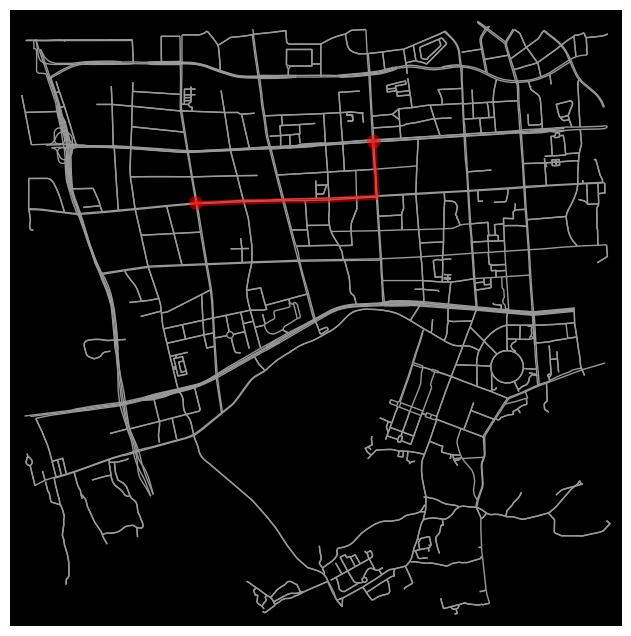

In [209]:
import networkx as nx

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

# Generate a BFS tree from the start node
bfs_tree = nx.bfs_tree(graph, source=start_node)

# Traverse the BFS tree to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(list(bfs_tree.predecessors(route[-1]))[0])
route = route[::-1]  # reverse the route to start from the start node

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')



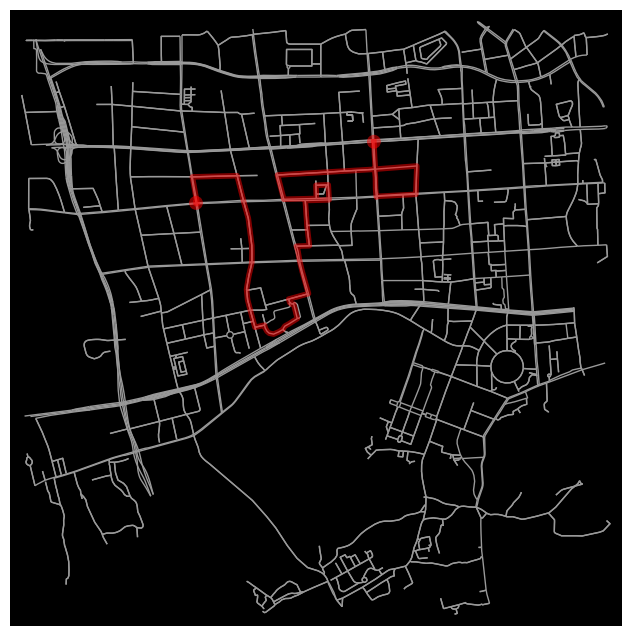

In [210]:

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

# Get the predecessors of each node in the DFS traversal
dfs_predecessors = nx.dfs_predecessors(graph, source=start_node)

# Traverse the predecessors to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(dfs_predecessors[route[-1]])
route = route[::-1]  # reverse the route to start from the start node

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')


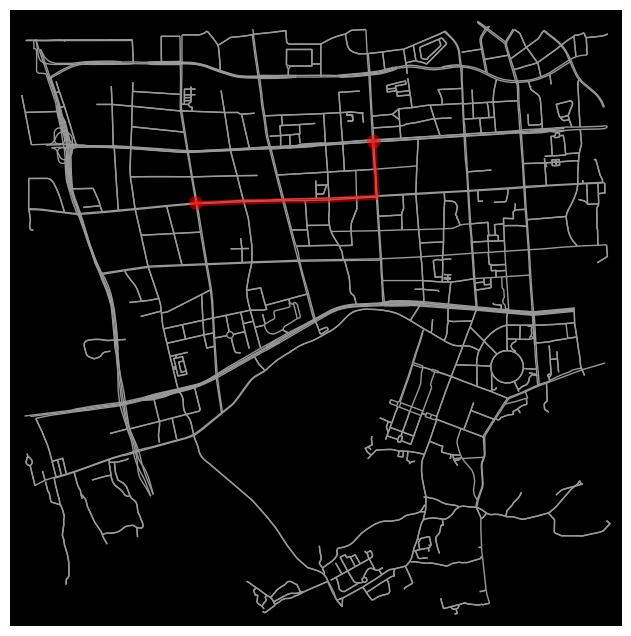

In [211]:

# Find the shortest path using Dijkstra's algorithm
route = nx.shortest_path(graph, source=start_node, target=end_node, method='dijkstra')

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

In [213]:
pip install optalgotools

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Using cached optalgotools-1.0.0-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 332556590 and 33992579.
Error calculating cost between nodes 33992579 and 271682869.
Error calculating cost between nodes 269967683 and 271683606.
Error calculating cost between nodes 271683606 and 33720419.
Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 332556590 and 33992579.
Error calculating cost between nodes 33992579 and 271682869.
Error calculating cost between nodes 271683593 and 333789551.
Error calculating cost between nodes 333789551 and 9528742118.
Error calculating cost between nodes 269967683 and 271683606.
Error calculating cost between nodes 271683606 and 33720419.
Error calculating cost between nodes 262909295 and 9528742117.
Error calculating cost between nodes 9528742117 and 26197715.
Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 332556590 and 3403595951.
Error calcu

AttributeError: 'NoneType' object has no attribute 'values'

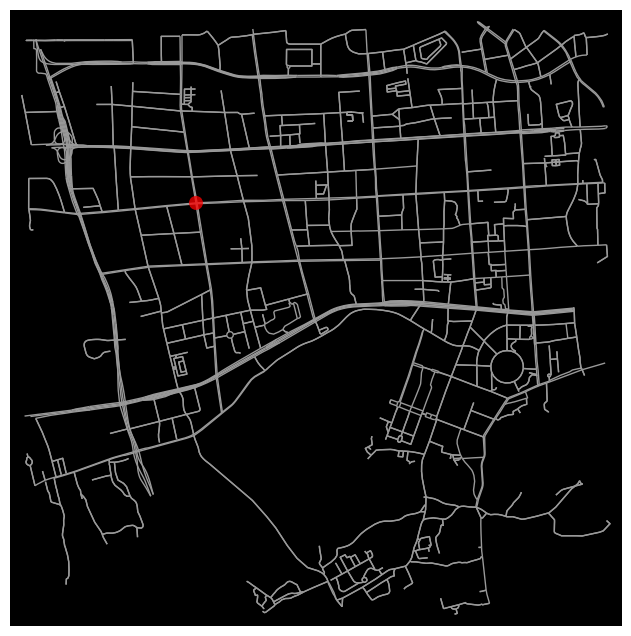

In [223]:
# Traverse the predecessors to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(dfs_predecessors[route[-1]])
route = route[::-1]  # reverse the route to start from the start node

# fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

import random
import math

def cost(route):
    total_cost = 0
    for u, v in zip(route[:-1], route[1:]):
        try:
            total_cost += graph[u][v][0]['length']
        except KeyError:
            print(f"Error calculating cost between nodes {u} and {v}.")
    return total_cost


def get_neighbour(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    new_route = route[:]
    new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
    return new_route

def simulated_annealing(route, T=1000, alpha=0.995, stopping_T=0.1):
    current_route = route[:]
    current_cost = cost(current_route)
    best_route = route[:]
    best_cost = current_cost
    
    while T > stopping_T:
        neighbour = get_neighbour(current_route)
        neighbour_cost = cost(neighbour)
        
        if neighbour_cost < best_cost:
            best_cost = neighbour_cost
            best_route = neighbour[:]
        
        if neighbour_cost < current_cost or random.random() < math.exp((current_cost - neighbour_cost) / T):
            current_route = neighbour[:]
            current_cost = neighbour_cost
        
        T *= alpha
    
    return best_route

nodes_to_visit = route  # replace with the list of nodes you want to visit
initial_route = nodes_to_visit + [start_node]

optimized_route = simulated_annealing(initial_route)

# Plot the optimized route
fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')